# Black Friday Purchase Forcasting (Exploratory Data Analysis)
### Dataset
https://www.kaggle.com/datasets/sdolezel/black-friday

<div>
    <h2>Problem Statement</h2>
A retail company "ABC Private Limited" wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics <i>(age, gender, marital status, city_type, stay_in_current_city)</i>, product details <i>(product_id and product category)</i> and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.
    </div>

<div>
    <h3>Dataset Description</h3>
    The dataset provides data about customer purchase behaviour related to different products belongs to three product categories. This dataset also includes customer demographic data like <i>age, gender, occupation, matital status, ...</i>
    <h4>Column Description</h4>
    <ol>
        <li><b>User_ID</b> - User ID
        <li><b>Product_ID</b> - Product ID
        <li><b>Gender</b> - Sex of User
        <li><b>Age</b> - Age in bins
        <li><b>Occupation</b> - Occupation (Masked)
        <li><b>City_Category</b> - Category of the City (A,B,C)
        <li><b>Stay_In_Current_City_Years</b> - Number of years stay in current city
        <li><b>Marital_Status</b> - Marital Status
        <li><b>Product_Category_1</b> - Product Category (Masked)
        <li><b>Product_Category_2</b> - Product may belongs to other category also (Masked)
        <li><b>Product_Category_3</b> - Product may belongs to other category also (Masked)
        <li><b>Purchase</b> - Purchase Amount (Target Variable)
    </ol>
</div>

<div class="alert alert-info">
    <h3>Table of content:</h3>
    <ol>
        <li><a href="#load_dataset">Load the dataset</a></li>
        <li><a href="#eda">Exploratory Data Analysis</a>
            <ol>
                <li><a href="#eda">Non-statistical Summary About the Dataset</a></li>
                <li><a href="#eda_explor_categorical_features">Explore Categorical Features</a></li>
                <li><a href="#missing_values">Dealing with Missing Values</a></li>
                <li><a href="#visualization">Data Visualization</a></li>
            </ol>
        </li>
        <li><a href="#feature_eng">Feature Engineering</a>
            <ol>
                <li><a href="#feature_eng">Encoding Categorical Features</a></li>
                <li><a href="#discriptive_statistics">Descriptive Statistics</a></li>
                <li><a href="#standardization">Feature Scaling</a></li>
            </ol>
        </li>
        <li>Model selection</li>
    </ol>
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split

%matplotlib inline

<a id="load_dataset" />

In [2]:
df = pd.read_csv('black_friday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


<a id="eda" />

## Exploratory Data Analysis (EDA)
### Non-statistical summary about the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
df.duplicated().any()

False

<div class='alert alert-info'>
    <h3>Observations:</h3>
    <ol>
        <li>Number of observations: <b>550068</b></li>
        <li>Number of columns: <b>12</b></li>
        <li><i>User_ID</i> and <i>Product_ID</i> columns are not usable</li>
        <li>There are no duplicated records in the dataset</li>
    </ol>
</div>

#### Drop User_ID and Product_ID columns

In [11]:
df.drop(['User_ID', 'Product_ID'], axis=1, inplace=True)
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969


<a id="eda_explor_categorical_features" />

### Explore Categorical Features

<div class="alert alert-info">
    By looking at above dataset, without doing any further analysis, we can see that following features are categorical features.
    <ol>
        <li>Gender</li>
        <li>Age (Age groups)</li>
        <li>City_category</li>
        <li>Marital_Status</li>
    </ol>
    </div>

### Further exploring the features...

In [12]:
df.Stay_In_Current_City_Years.value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [13]:
df['Product_Category_1'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

<div class='alert alert-info'>
    <h3>Observations:</h3>
    <ol>
        <li><b>Stay_In_Current_City_Years</b> can be considered as a categorical feature.</li>
        <li><b>Product_Category_1, Product_Category_2 and Product_Category_3</b> should be considered as <b>categorical</b> features.</li>
    </ol>
    <h4>Every independent feature in the dataset is a categorical feature.</h4>
</div>

<a id="missing_values" />

### Dealing with missing values

In [14]:
df.isna().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

<div class='alert alert-info'>
    <h3>Observations:</h3>
    <h4>Product_Category_2 and Product_Category_3 have huge number of NaN values.</h4>
    Since the number is very large, we cannot drop those records.<br/>
    Since these fields are <b>categorical</b>, we can use <b>mode</b> to replace NaN values.
</div>

In [15]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [16]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,8.0,16.0,1422
3,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,M,55+,16,C,4+,0,8,8.0,16.0,7969


In [17]:
df.isna().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [18]:
df.dtypes

Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

<a id="visualization"></a>
### Data Visualization
#### Univariate Analysis
Explore the diatribution of numerical features.

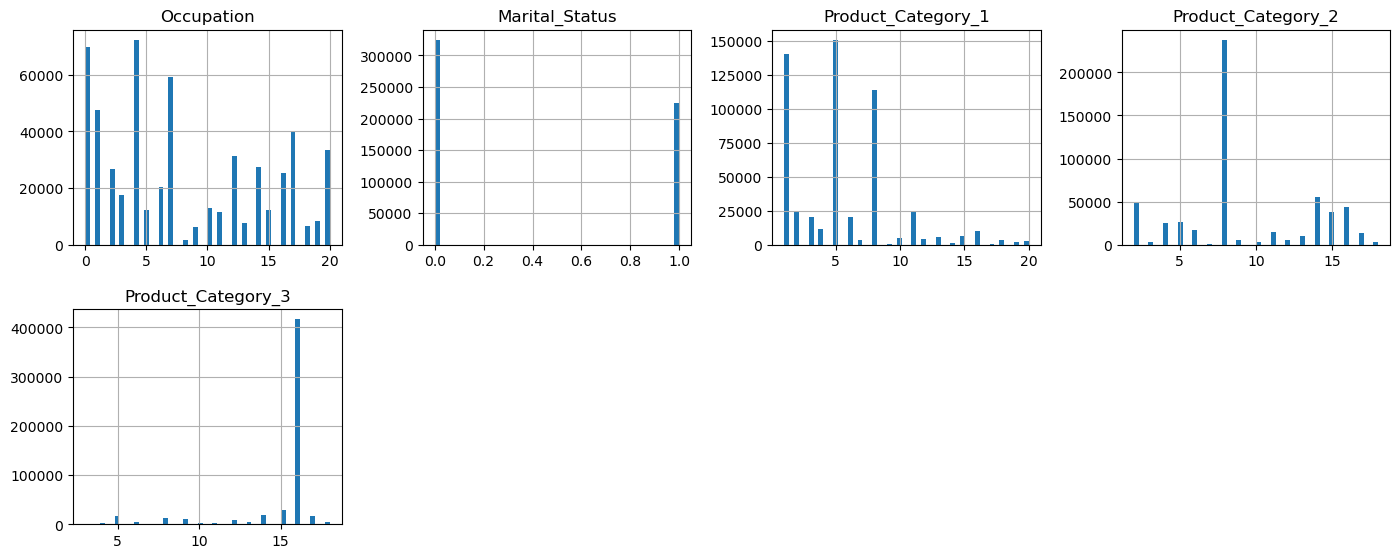

In [20]:
columns = list(df.drop('Purchase', axis=1)) # select first 8 colums
df[columns].hist(bins=50, figsize=(17, 50), layout=(14, 4))
plt.show()

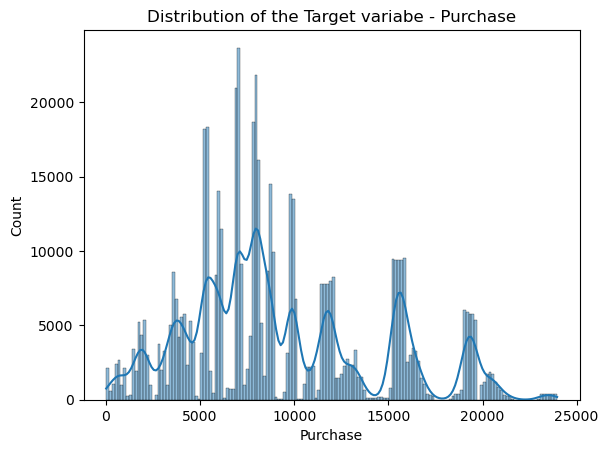

In [24]:
sns.histplot(data=df['Purchase'], kde=True)
plt.title('Distribution of the Target variabe - Purchase')
plt.show()

<h4>Boxplots help to</h4>
<ul>
    <li>Visualizing and Comparing Distributions</li>
    <li>Detecting Outliers</li>
    <li>Summarizing Data</li>
    <li>Identifying Skewness</li>
</ul>

<Axes: >

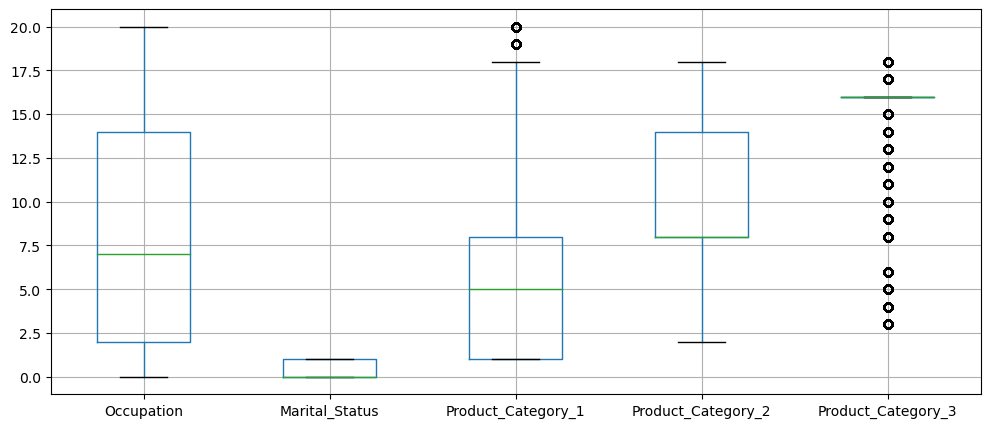

In [25]:
df.loc[:, list(df)[0:-1]].boxplot(figsize=(12, 5))

<Axes: >

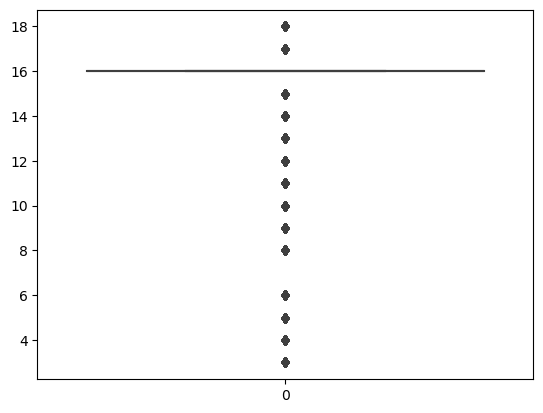

In [26]:
sns.boxplot(df['Product_Category_3'])

<div class='alert alert-info'>
    <h3>Observations:</h3>
    <ol>
        <li><b>Occupations</b> 0 to 7 has the most purchases
        <li>People show are stay in the city for one year has the most purchases
        <li>People have purchased between 5000 to 10000 units the most.
        <li><b>Product category 2 and 3</b> seems to have outliers. (<b>Product category 3</b> has a large number of them)
    </ol>
    The reason for outliers in <b>Product category 2 and 3</b> is, we replaced a huge number of missing values with <b>mode</b> of those columns. So, we ignore outliers in those columns.
</div>

In [27]:
df.corr(numeric_only=True)

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Occupation,1.000000,0.024280,-0.007618,0.001566,0.000246,0.020833
Marital_Status,0.024280,1.000000,0.019888,0.010260,0.013978,-0.000463
Product_Category_1,-0.007618,0.019888,1.000000,0.279247,0.317944,-0.343703
Product_Category_2,0.001566,0.010260,0.279247,1.000000,0.463188,-0.128651
Product_Category_3,0.000246,0.013978,0.317944,0.463188,1.000000,-0.185945
Purchase,0.020833,-0.000463,-0.343703,-0.128651,-0.185945,1.000000


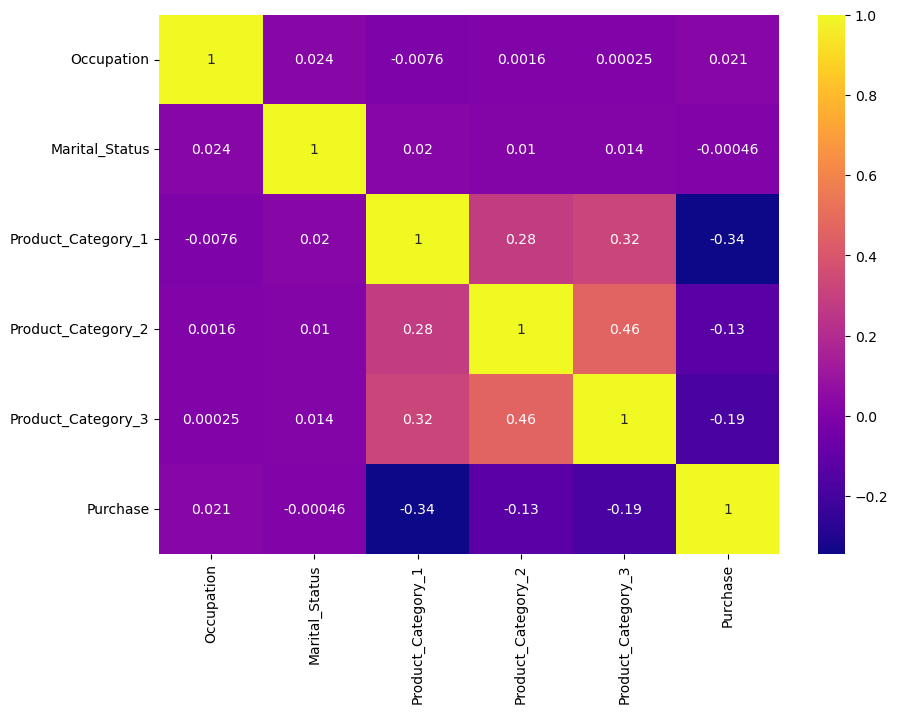

In [28]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(numeric_only=True), vmax=1, square=False, annot=True, cmap='plasma')
plt.show()

<div class='alert alert-info'>
    <h3>Observations:</h3>
    Stay_In_Current_City_Years and Marital_Status have very correlation with dependent variable.
</div>

<a id="bivariate_analysis"></a>
#### Bivariate Analysis

In [45]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,8.0,16.0,1422
3,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,M,55+,16,C,4,0,8,8.0,16.0,7969


#### Purchase Amount by different Age Groups and Gender
Following Cross Tabulation and Bar Graph shows how much amount has been purchased by people in different Age groups.

In [111]:
pd.crosstab(df.Age, [df.Gender], values=df.Purchase, aggfunc=np.sum, margins=True)

Gender,F,M,All
Age,,,
0-17,42385978,92527205,134913183
18-25,205475842,708372833,913848675
26-35,442976233,1588794345,2031770578
36-45,243438963,783130921,1026569884
46-50,116706864,304136539,420843403
51-55,89465997,277633647,367099644
55+,45782765,154984610,200767375
All,1186232642,3909580100,5095812742


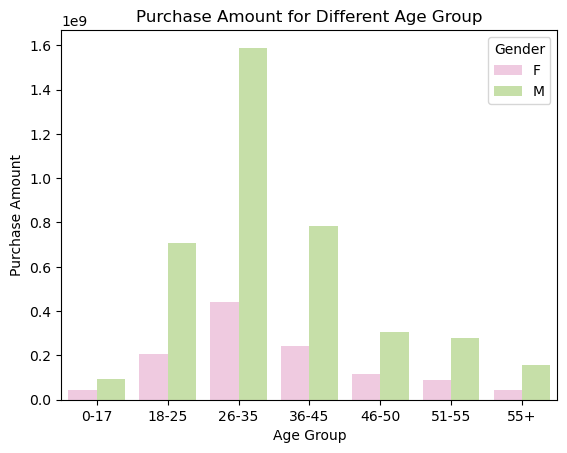

In [122]:
purchase_amount_per_age_group = df.groupby(by=['Age', 'Gender']).sum(numeric_only=True)['Purchase'].to_frame().reset_index()

sns.barplot(data=purchase_amount_per_age_group.reset_index(), x='Age', y='Purchase', hue='Gender', palette='PiYG')
plt.title('Purchase Amount for Different Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount')
plt.show()

<div class='alert alert-info'>
    <h3>Observations:</h3>
    <ol>
        <li>Age group <b>26-35</b> has the maximum purchase amount (~2.0B units).
        <li>Age group <b>26-35</b> shows significantly large gap camparing to other groups, in terms of purchase amount.
        <li>Men has purchased more than women in every age group.        
    </ol>
</div>

#### Purchase Amount by different City Category and Gender
Following Cross Tabulation and Bar Graph shows how much amount has been purchased by people in different City Categories.

In [128]:
pd.crosstab(df.City_Category, [df.Gender], values=df.Purchase, aggfunc=np.sum, margins=True)

Gender,F,M,All
City_Category,,,
A,306329915,1010141746,1316471661
B,493617008,1621916597,2115533605
C,386285719,1277521757,1663807476
All,1186232642,3909580100,5095812742


In [257]:
city_category_counts = df['City_Category'].value_counts()
city_category_counts

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

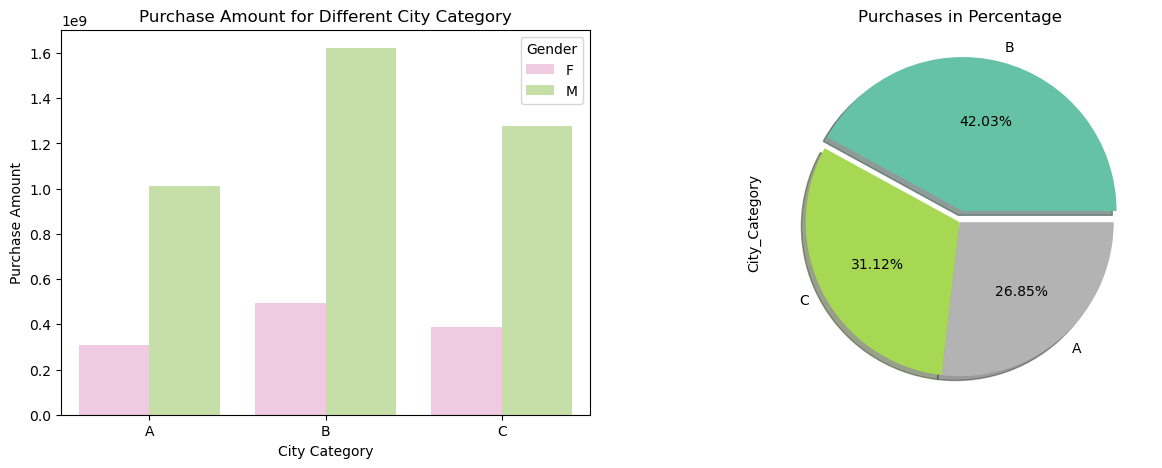

In [274]:
purchase_amount_by_city_category = df.groupby(by=['City_Category', 'Gender']).sum(numeric_only=True)['Purchase'].reset_index()

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=purchase_amount_by_city_category, x='City_Category', y='Purchase', hue='Gender', palette='PiYG')
plt.title('Purchase Amount for Different City Category')
plt.xlabel('City Category')
plt.ylabel('Purchase Amount')

plt.subplot(1, 2, 2)
explode = city_category_counts * 0
explode[0] = 0.075
city_category_counts.plot(kind='pie', explode=explode, autopct='%1.2f%%', shadow=True, colormap='Set2')
plt.title('Purchases in Percentage')
plt.show()

<div class='alert alert-info'>
    <h3>Observations:</h3>
    <ol>
        <li>City Category <b>B</b> shows the maximum purchase amount (~2.1B units - <b>42.03%</b>) followed by category <b>C</b> cities (~1.6B units - <b>31.12%</b>).
        <li>Minimum amount of purchase has done by category <b>C</b>.
        <li>Most probably,
            <ul>
                <li>City Category B is a <b>high-income</b> area</li>
                <li>City Category C is a <b>middle-income</b> area</li>
                <li>City Category A is a <b>low-income</b> area</li>
            </ul></li>
        <li>Men has purchased more than women in every city category.
    </ol>
</div>

#### Purchase Amount by different Occupation and Gender
Following Cross Tabulation and Bar Graph shows how much amount has been purchased by different Occupations.

In [216]:
ct = pd.crosstab(df.Occupation, df.Gender, values=df.Purchase, aggfunc=np.sum, margins=True).sort_values(by='All')
ct.drop('All', axis=0, inplace=True)
ct.sort_values(by='All', ascending=False)

Gender,F,M,All
Occupation,,,
4,152264321,513980163,666244484
0,159883833,475523125,635406958
7,91177610,466193977,557371587
1,152806726,271807418,424614144
17,37496159,355785294,393281453
12,31762002,273687444,305449446
20,73428976,223141466,296570442
14,58010060,201444632,259454692
16,36820127,201526828,238346955


In [246]:
occupation_purchases = ct
occupation_purchases.reset_index(inplace=True)

Following graph has been sorted by Total Purchase Amount.

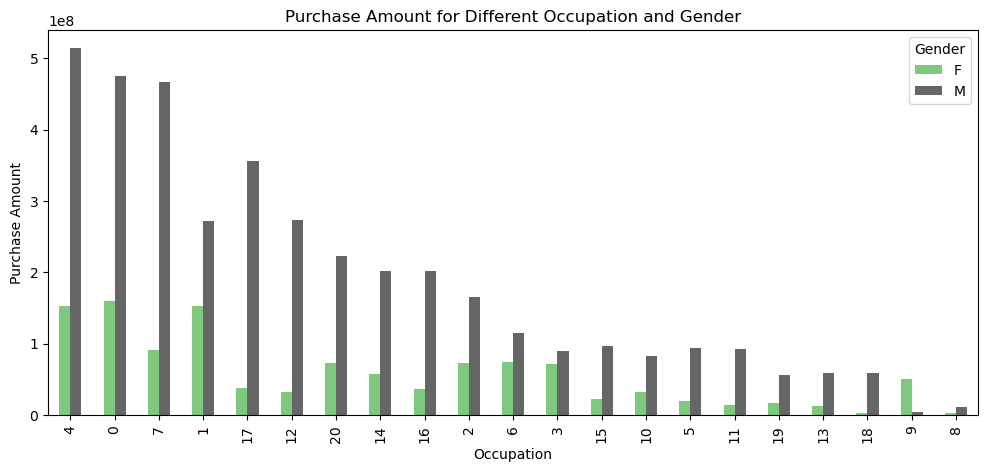

In [253]:
#purchase_amount_by_occupation = df.groupby(by=['Occupation', 'Gender']).agg(total_purchased=('Purchase', 'sum')).reset_index()
#purchase_amount_by_occupation
occupation_purchases.sort_values(by='All', ascending=False, inplace=True)
#occupation_purchases
occupation_purchases.plot(
    kind='bar', x='Occupation', 
    y=['F', 'M'], 
    figsize=(12, 5), 
    title='Purchase Amount for Different Occupation and Gender',
    xlabel='Occupation',
    ylabel='Purchase Amount',
    colormap='Accent')
plt.show()

<div class='alert alert-info'>
    <h3>Observations:</h3>
    <ol>
        <li>Occupation <b>4</b> shows the maximum Purchase Amount (~666M units) followed by Occupation <b>0</b> (~635M units).
        <li>Minimum purchase amount has been showed by Occupation 8.
        <li>Occupations <b>4, 0, 7 and 17</b> are seems highly paid occupations.</li>
        <li>Men has purchased more than women in every Occupation except Occupation 9.
        <li>Occupation 9 seems to be a <b>Female-dominant</b> occupation.
    </ol>
</div>

In [286]:
df.groupby(by=['Occupation']).agg(city_cat_count=('City_Category', 'value_counts'))

city_cat_count
Occupation City_Category                
0          B                       29850
           C                       20930
           A                       18858
1          B                       19756
           C                       14861
...                                  ...
19         C                        2825
           A                        2236
20         B                       14400
           A                       12743
           C                        6419

[63 rows x 1 columns]

<a id="feature_eng"></a>
## Feature Engineering
### Encoding Categorical Features
Here we perform **One-Hot encoding** technique to generate new features based on some of the categorical features in the dataset.

In [34]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,8.0,16.0,1422
3,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,M,55+,16,C,4+,0,8,8.0,16.0,7969


#### Clean up **Stay_In_Current_City_Years** feature
we can see Stay_In_Current_City_Years has a value like **4+** which is a non-numeric value. We can remove the + sign and make the entire field numeric easily.

In [35]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '')
df.head()

C:\Users\navilog\AppData\Local\Temp\ipykernel_17448\2030241946.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '')


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,8.0,16.0,1422
3,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,M,55+,16,C,4,0,8,8.0,16.0,7969


In [36]:
# convert Stay_In_Current_City_Years into int
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [37]:
df.dtypes

Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [38]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

<div class="alert alert-info">
    <h3>Observation:</h3>
    <ol>
        <li>Age group 26-35 represents the maximum purchases followed by the Age group 36-45</li>
        <li>Minimum purchases has done by the Age group 0-17</li>
    </ol>
</div>

Convert these groups into nemeric values.

In [28]:
age_group_num = {
    '0-17': 1,
    '55+': 2,
    '51-55': 3,
    '46-50': 4,
    '18-25': 5,
    '36-45': 6,
    '26-35': 7
}

df['Age'] = df['Age'].replace(age_group_num)

In [29]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,1,10,A,2,0,3,8.0,16.0,8370
1,F,1,10,A,2,0,1,6.0,14.0,15200
2,F,1,10,A,2,0,12,8.0,16.0,1422
3,F,1,10,A,2,0,12,14.0,16.0,1057
4,M,2,16,C,4,0,8,8.0,16.0,7969


In [30]:
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [31]:
city_category_dum = pd.get_dummies(df['City_Category'], prefix='City_Category')
city_category_dum

,City_Category_A,City_Category_B,City_Category_C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
550063,0,1,0
550064,0,0,1
550065,0,1,0
550066,0,0,1


In [32]:
df_final = pd.concat([df, city_category_dum], axis=1)

Convert Gender values to nemerical

In [33]:
num_gender = {
    'F': 0,
    'M': 1
}

df_final['Gender'] = df_final['Gender'].replace(num_gender)

In [34]:
df_final.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_A,City_Category_B,City_Category_C
0,0,1,10,A,2,0,3,8.0,16.0,8370,1,0,0
1,0,1,10,A,2,0,1,6.0,14.0,15200,1,0,0
2,0,1,10,A,2,0,12,8.0,16.0,1422,1,0,0
3,0,1,10,A,2,0,12,14.0,16.0,1057,1,0,0
4,1,2,16,C,4,0,8,8.0,16.0,7969,0,0,1


In [35]:
df_final.drop('City_Category', axis=1, inplace=True)
df_final.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_A,City_Category_B,City_Category_C
0,0,1,10,2,0,3,8.0,16.0,8370,1,0,0
1,0,1,10,2,0,1,6.0,14.0,15200,1,0,0
2,0,1,10,2,0,12,8.0,16.0,1422,1,0,0
3,0,1,10,2,0,12,14.0,16.0,1057,1,0,0
4,1,2,16,4,0,8,8.0,16.0,7969,0,0,1


In [36]:
df_final.dtypes

Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
City_Category_A                 uint8
City_Category_B                 uint8
City_Category_C                 uint8
dtype: object

<a id="discriptive_statistics"></a>
### Desciptive Statistics

In [37]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,550068.0,0.753105,0.431205,0.0,1.0,1.0,1.0,1.0
Age,550068.0,5.548230,1.628010,1.0,5.0,6.0,7.0,7.0
Occupation,550068.0,8.076707,6.522660,0.0,2.0,7.0,14.0,20.0
Stay_In_Current_City_Years,550068.0,1.858418,1.289443,0.0,1.0,2.0,3.0,4.0
Marital_Status,550068.0,0.409653,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,550068.0,9.260768,4.294093,2.0,8.0,8.0,14.0,18.0
Product_Category_3,550068.0,14.989567,2.739846,3.0,16.0,16.0,16.0,18.0
Purchase,550068.0,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0
City_Category_A,550068.0,0.268549,0.443205,0.0,0.0,0.0,1.0,1.0


<div class="alert alert-info">
    <h4>Observations:</h4>
    <ul>
        <li>Above descriptive statistics shows that <b>Standard Deviation</b> and <b>Mean</b> varies significantly among features.</li>
    </ul>
</div>

<a id="standardization"></a>
### Feature Scaling
**StandardScaler()** will use to standardize features.
#### Steps
1. Separate **Independent features** and **dependent** feature.
2. Apply StandardScaler

In [38]:
X = df_final.drop('Purchase', axis=1)
y = df_final['Purchase']

In [39]:
print('X shape: ', X.shape)
print('y shape: ', y.shape)

X shape:  (550068, 11)
y shape:  (550068,)


In [40]:
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [41]:
X

array([[-1.74651251, -2.79373797,  0.29486356, ...,  1.65036982,
        -0.85142167, -0.67214331],
       [-1.74651251, -2.79373797,  0.29486356, ...,  1.65036982,
        -0.85142167, -0.67214331],
       [-1.74651251, -2.79373797,  0.29486356, ...,  1.65036982,
        -0.85142167, -0.67214331],
       ...,
       [-1.74651251,  0.89174547,  1.06142262, ..., -0.6059248 ,
         1.17450616, -0.67214331],
       [-1.74651251, -2.17949073, -1.08494277, ..., -0.6059248 ,
        -0.85142167,  1.48777797],
       [-1.74651251, -0.95099625, -1.23825458, ..., -0.6059248 ,
         1.17450616, -0.67214331]])

### Now the dataset is ready for Model building
But in this project I focussed only on EDA and Feature Engineering.

-- Thank You --